# Lectura y Generación de Archivos

Hasta ahora, todos los ejemplos en el curso han usado entradas del usuario (teclado) y salidas con resultados desplegados en la pantalla. 

Cuando se requiere analizar grandes cantidaddes de datos y guardar otros datos procesados, ya no es posible hacerlo sólo en la pantalla. 


In [1]:
# read_test.py
# Simple read of a text file

# Reading line by line
print('Line by line')
fname = 'test_file.dat'
f = open(fname, 'r')
for line in f:
   print(line, end='')
f.close()

# reading file into list
print('')
print('File as list')
f = open(fname, 'r')
f_list = list(f)
print(f_list)
print(f_list[1])
f.close()

# Reading and printing all the file
print('Print entire file')
fname = 'test_file.dat'
f = open(fname, 'r')
text = f.read()
print(text)


Line by line
This is line one
This is line 2
This is line three
This is the fourth line

File as list
['This is line one\n', 'This is line 2\n', 'This is line three\n', 'This is the fourth line\n']
This is line 2

Print entire file
This is line one
This is line 2
This is line three
This is the fourth line



El archivo tiene el siguiente formato

``
This is line one
This is line 2
This is line three
This is the fourth line
``


# I/O de datos en Python

El objetivo es poder leer y guardar `tablas` de datos en filas y columnas, con valores numéricos. 

In [4]:
# read_data.py
# Read a simple data file with numerical values

import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = 'some_data.dat'

# Import file: data
data = np.loadtxt(file)#, dtype='float')

print(data)




[[ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  9.9984770e-01  1.7452406e-02]
 [ 2.0000000e+00  9.9939083e-01  3.4899497e-02]
 ...
 [ 7.1800000e+02  9.9939083e-01 -3.4899497e-02]
 [ 7.1900000e+02  9.9984770e-01 -1.7452406e-02]
 [ 7.2000000e+02  1.0000000e+00 -4.8985872e-16]]


Las tablas de datos son difíciles de __leer__ simplemente mirando los números. Vamos a graficar los datos (aunque esto viene en el próximo capítulo. 

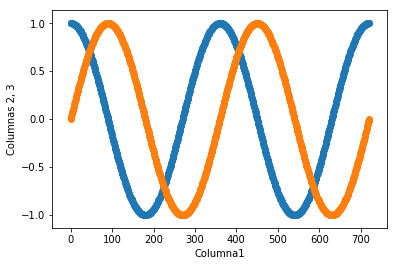

In [5]:
# Plot results
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(data[:, 0], data[:, 2])
plt.xlabel('Columna1')
plt.ylabel('Columnas 2, 3') 
plt.savefig('chap5_fig1.png') 
plt.show()

El comando `np.loadtxt` tiene una gran variedad de opciones para leer los
archivos (digite help(`np.loadtxt`) en Python para ver la documentación). El
formato general de la función tiene muchas opciones, acá sólo muestro algunas
de ellas

``
loadtxt(fname, dtype=’float’, comments=’#’,
delimiter=’,’, skiprows=1, usecols=[0,2])
``

donde se le ordena a `loadtxt` leer los datos como floats, lineas con comentarios
se marcan como `#` y no son leídas, las columnas están separadas por comas
(típico de archivos .csv), se salta una línea que puede ser el encabezado y sólo
se leen la primera y tercera columna. Note que todos los comandos (a excepción
del nombre del archivo son opcionales) y Python asume algunos valores. Por
ejemplo, las columnas por defecto están separadas por espacios, y los valores se
asumen como float.


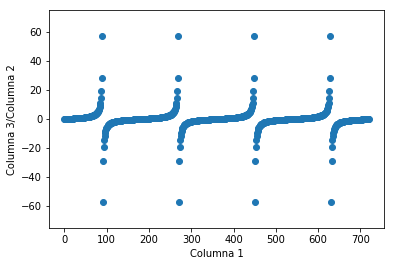

In [6]:
# read_data2.py
# Read a simple data file with numerical values
# and a header

import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = 'some_data_header.dat'

# Import file: data
data = np.loadtxt(file, skiprows=1)

# Plot results
plt.scatter(data[:, 0], data[:, 2]/data[:,1])
plt.ylim(-75, 75)
plt.ylabel('Columna 3/Columna 2')
plt.xlabel('Columna 1')
plt.show()

# Archivos más complejos

Existen archivos más complejos que requieren de mayor trabajo para leerlos.
Un ejemplo es un archivo que contiene los nombres de estaciones sismológicas
de la red nacional de Colombia y su latitud, longitud y elevación. El archivo
tiene el siguiente formato

``
APAC           7.9     -76.58       195
ARGC           9.585   -74.246      117.9
BBAC           2.022   -77.247      1716
BAR2           6.592   -73.184      1783
BRR            7.107   -73.712       104
BET            2.723   -75.418    5583.3
``

donde las diferentes columnas están separadas por espacios (el número de espacios
puede variar). `Numpy` tiene una función que en principio puede leer este
tipo de archivos np.genfromtxt(), pero a mi personalmente no me gustó como
se comportaba con diferentes archivos.

Python tiene un paquete (que debe ser instalado en su equipo) conocido
como `Pandas`. Este paquete tiene la capacidad de leer archivos planos, mixtos
(caracteres y números) e incluso archivos de Excel y Matlab. Abajo, un ejemplo
de cómo leer el archivo anterior:

In [9]:
# read_stations.py
# Read seismic station info from the RSNC
# File is Tab delimited

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

fname = 'rsnc.dat'
data = pd.read_csv(fname, delim_whitespace=True, header=None)

sta = np.array(data[0])
lat = np.array(data[1])
lon = np.array(data[2])
ele = np.array(data[3])
print(sta)
print(lat)

# Plot results
map = Basemap(projection='merc', lat_0 = 4, lon_0 = -72,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-85, llcrnrlat=-2,
    urcrnrlon=-65, urcrnrlat=15)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
x,y = map(lon, lat)
map.plot(x, y, 'b^', markersize=5)
plt.show()


KeyError: 'PROJ_LIB'